### PROBLEM 6.1.
The file BostonHousing.csv contains
information collected by the US Bureau of the Census concerning housing in the
area of Boston, Massachusetts. The dataset includes information on 506 census
housing tracts in the Boston area. The goal is to predict the median house price in
new tracts based on information such as crime rate, pollution, and number of
rooms. The dataset contains 13 predictors, and the outcome variable is the median
house price (MEDV). Table 6.11 describes each of the predictors and the outcome
variable.
- a. Why should the data be partitioned into training and validation sets? What
will the training set be used for? What will the validation set be used for?
- b. Fit a multiple linear regression model to the median house price (MEDV) as a
function of CRIM, CHAS, and RM. Write the equation for predicting the
median house price from the predictors in the model.
- c. Using the estimated regression model, what median house price is predicted
for a tract in the Boston area that does not bound the Charles River, has a
crime rate of 0.1, and where the average number of rooms per house is 6?
- d. Reduce the number of predictors:
-- i. Which predictors are likely to be measuring the same thing among the 13
predictors? Discuss the relationships among INDUS, NOX, and TAX.
-- ii. Compute the correlation table for the 12 numerical predictors and search
for highly correlated pairs. These have potential redundancy and can
cause multicollinearity. Choose which ones to remove based on this table.
-- iii. Use three subset selection algorithms: backward, forward, and
stepwise) to reduce the remaining predictors. Compute the validation
performance for each of the three selected models. Compare RMSE,
MAPE, and mean error, as well as histograms of the errors. Finally,
describe the best model.

a) Partitioning the data into traning and validation sets is a crucial step in the process of developing a predictive model. The training set will be used to train and develop the model, the model will thus learn from the data how to tune its parameters. The validation set will then be used at the end of the training process to evaluate the model's performance and fine-tune its parameters by a repeated analysis of the validation set. It's important to have both parts so we can be sure to try our model on data that are new for it but that we know well and evaluate its predictive potential.

b) Fit a multiple linear regression model to the median house price (MEDV) as a
function of CRIM, CHAS, and RM

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [80]:
bh_df = pd.read_csv("BostonHousing.csv")

In [81]:
bh_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [82]:
bh_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [83]:
bh_df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [84]:
predictors = ['CRIM','CHAS', 'RM']
outcome = 'MEDV'

In [85]:
print(bh_df[predictors])

        CRIM  CHAS     RM
0    0.00632     0  6.575
1    0.02731     0  6.421
2    0.02729     0  7.185
3    0.03237     0  6.998
4    0.06905     0  7.147
..       ...   ...    ...
501  0.06263     0  6.593
502  0.04527     0  6.120
503  0.06076     0  6.976
504  0.10959     0  6.794
505  0.04741     0  6.030

[506 rows x 3 columns]


In [86]:
X = bh_df[predictors]
y = bh_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [87]:
model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'MEDV': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})

In [89]:
train_results.head()

,MEDV,predicted,residual
452,16.1,22.008204,-5.908204
346,17.2,19.893624,-2.693624
295,28.6,26.371008,2.228992
88,23.6,29.127448,-5.527448
322,20.4,21.014621,-0.614621


In [88]:
# print coefficients
print('intercept ', model.intercept_)
print(pd.DataFrame({'Predictors': X.columns, 'coefficient': model.coef_}))

# print performance measures
regressionSummary(train_y, model.predict(train_X))

intercept  -29.19346743060684
  Predictors  coefficient
0       CRIM    -0.240062
1       CHAS     3.266817
2         RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


In [90]:
print("The coefficients of the predictors are: ", model.coef_)

The coefficients of the predictors are:  [-0.24006218  3.26681728  8.3251753 ]


In [91]:
print("The intercept value is: ", model.intercept_)

The intercept value is:  -29.19346743060684


c) what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

In [92]:
new_df = pd.DataFrame([[0.1, 0, 6]], columns=['CRIM', 'CHAS', 'RM'])

In [93]:
print(new_df[predictors])

   CRIM  CHAS  RM
0   0.1     0   6


In [94]:
X = new_df[predictors]

In [95]:
# Use predict() to make predictions on a new set
new_df_pred = model.predict(new_df)
print(new_df_pred)

[20.73357813]


<b>The median house price for the indicated values, based on our model, is $ 20,733.58</b>

d - I) Between the 13 predictors, NOX and AGE are likely to be measuring the same part of variation since old buildings are usually more polluting than new buildings and an increase in the average age should imply an increase in the consentration of nitric oxide. Also INDUS and NOX are probaby measuring the same thing since the concentration of nitric oxide depends highly on the concentration of industries in the area. Regarding the relationship among INDUS, NOX and TAX, the first 2 variables should be highly positive correlated and each of them should be positive correlated with TAX.

d - II)

In [96]:
import seaborn as sns

In [97]:
bh2_df = bh_df.loc[:, bh_df.columns.drop(['MEDV', 'CAT. MEDV'])]

In [98]:
corr = bh2_df.corr()

In [99]:
def highlight_cells(val):
    color = 'yellow' if (val > 0.7 and val != 1) or val < -0.7 else ''
    return 'background-color: {}'.format(color)

corr.style.applymap(highlight_cells)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


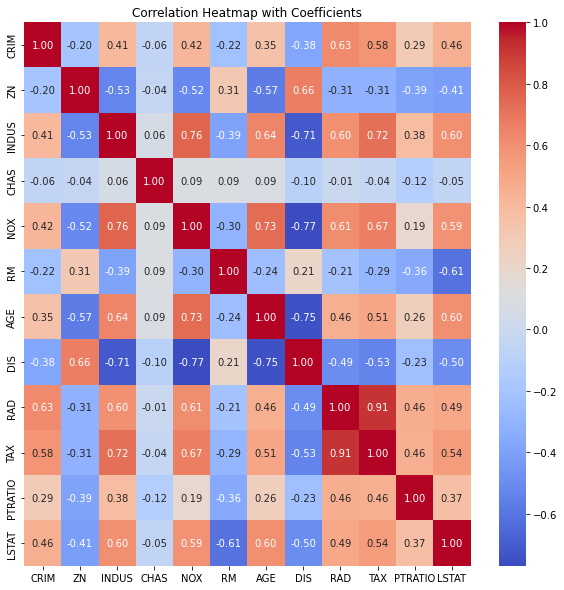

In [100]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax = ax)
plt.title('Correlation Heatmap with Coefficients')
plt.show()

From the correlation table and heatmap we can see that we have 4 couples of variables with a strong positive correlation (>0.7) and 3 with a strong negative correlation (<-0.7). Based on this table, the variables that could be removed are: DIS (because it has a high correlation with 3 other variables and doesn't add much information to tour analysis), TAX (since it's highly correlated with 2 other variables, and AGE (since it's higlhy correlated with NOX).

d - III)

In [101]:
predictors = ['CRIM','ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
X = bh_df[predictors]
y = bh_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [102]:
#backward elimination

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove AGE
Step: score=1803.57, remove INDUS
Step: score=1803.57, remove None
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


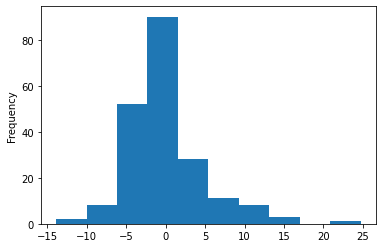

In [103]:
#backward elimination validation errors histogram

bh_df_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - bh_df_pred

all_residuals.plot(kind='hist')
plt.show()

In [104]:
#forward elimination

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


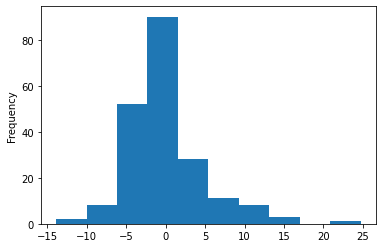

In [105]:
#forward elimination validation errors histogram

bh_df_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - bh_df_pred

all_residuals.plot(kind='hist')
plt.show()

In [106]:
#stepwise elimination

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733


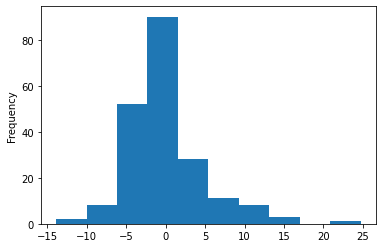

In [107]:
#stepwise elimination validation errors histogram

bh_df_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - bh_df_pred

all_residuals.plot(kind='hist')
plt.show()


From the regression summary of each of the three models (created with the three different subset selection algorithms, which dropped the same two variables - AGE and INDUS), we can see that RMSE, MAPE, and ME are the same for all the models, consequently all the three histograms show the same distribution and values, from which we can individuate the presence of one or a few upper outliers which will need special attention and further investigation. In this case, we can conclude that all the three models have the same performance in predicting the median house price in the area of Boston and there is no best model between them. 
Overall, the Mean Error of our models, -0.039, indicates that our model is on average underpredicting the median house price; the MAPE of our models, 16.97, indicates that the accuracy of the models is low but still acceptable (it's usually considered low but acceptable between 10.00 and 25.00); the RMSE is 5.08 (x1000$).